**UNIVERSIDADE FEDERAL DO PARÁ**

Faculdade de Computação

Professor: Elinei Santos

Aluno: Luiz Sérgio Samico Maciel Filho

**Primeira Lista Avaliativa**

---

Obs. 1: As equações utilizadas nas questões estão numeradas e são referenciadas por dito número caso sejam utilizadas em outra questão.

Obs. 2: Utilizou-se da biblioteca numpy por uma questão de familiaridade.

Obs. 3: No código, as variáveis estão numeradas como $v_{ij}$ onde $v$ é o nome da variável, $i$ é o número da questão e $j$ é a numeração da variável caso haja mais de uma variável de mesma natureza, e.g. q32 significa uma carga $q_2$ na questão 3.

#### 1ª Questão: 

_Uma partícula com carga +2 nC (1 nanocoulomb é $1\times10^{-9}$) está localizada na origem. Qual é o campo elétrico devido a essa partícula na posição: (-0,2; -0,2; -0,2) m?_

##### **Solução**

O campo elétrico, $\vec{E}$, em um determinado ponto no espaço é dado pela equação $$\vec{F}=q\vec{E} \tag{1},$$ onde $q$ é a carga da partícula na origem.

Se o campo varia de um ponto ao outro, ele pode ser escrito matemáticamente como um vetor em função da posição, escrito na forma:
$$ \vec{E}(x,y,z) = E_x(x,y,z)\hat{x} + E_y(x,y,z)\hat{y} + E_z(x,y,z)\hat{z}, \tag{2}$$

onde $E_x$, $E_y$ e $E_z$ são as componentes de $\vec{E}$, e $x$, $y$ e $z$ são as cordenadas cartesianas do ponto em relação a um sistema de coordenadas. É comum que $\vec{E}(x,y,z)$ seja representado como $\vec{E}(\vec{r})$, onde $\vec{r}$ é o vetor do ponto de origem até o ponto onde o campo deve ser determinado.

De modo que, considerando a equação da Lei de Coulomb ao longo do vetor unitário $\hat{r}$ $$ \vec{F}=k_e\frac{q_1 q_2}{r^2}\hat{r}, \tag{3}$$ onde a partícula de carga $q_2$ está na origem e a partícula de carga $q_1$ está no fim do vetor posição $\vec{r}$, e combinando com a Equação (1), temos $$ \vec{E}(\vec{r})=k_e \frac{q_2}{r^2}\hat{r}. \tag{4}$$

Reescrevendo, temos $$ \vec{E}=k_e \frac{Q}{R^2}\hat{R}= \frac{Q}{R^2}\frac{\vec{R}}{R}. \tag{5} $$

Assim, considerando a magnitude $R$ composta pelos componentes de $\vec{R}$ ($R_x$, $R_y$ e $R_z$), onde $$ \vec{R} = \vec{r} - \vec{r}_Q, \tag{6}$$ em que $r_Q$ é a posição da carga pontual e $\vec{r}$ é a posição onde desejamos calcular o campo elétrico, temos que $$ R = [(x-x_q)^2 + (y-y_q)^2 + (z-z_q)^2]^{\frac{1}{2}}. \tag{7}$$

E, portanto, podemos reescrever a Equação (5) como $$ \vec{E}=k_e \left( \frac{Q}{R^2}\right)\hat{E}, \tag{8} $$ onde $$ \hat{E}=\left( \frac{x-x_Q}{R}\right)\hat{x} + \left( \frac{y-y_Q}{R}\right)\hat{y} + \left( \frac{z-z_Q}{R}\right)\hat{z}, \tag{9}$$ com $R$ definido na Equação (7).

##### Equação para obter o vetor campo elétrico

Finalmente, podemos escrever a equação para obter o vetor campo elétrico em determinada coordenada $(x, y, z)$ decorrente de uma partícula nas coordenadas $(xq, yq, zq)$: $$ \vec{E}=k_e\frac{Q}{R^2}\left[ \frac{x-x_Q}{[(x-x_q)^2 + (y-y_q)^2 + (z-z_q)^2]^{\frac{1}{2}}}\hat{x} + \frac{y-y_Q}{[(x-x_q)^2 + (y-y_q)^2 + (z-z_q)^2]^{\frac{1}{2}}}\hat{y} + \frac{z-z_Q}{[(x-x_q)^2 + (y-y_q)^2 + (z-z_q)^2]^{\frac{1}{2}}}\hat{z}\right]. \tag{10} $$

##### Equação para obter o módulo do vetor campo elétrico

Lembrando que a equação para obter o módulo do vetor campo elétrico é $$ E = \sqrt{Ex^2+Ey^2+Ez^2} \tag{11}$$

O código em Python que determina o campo elétrico na posição (-0,2; -0,2; -0,2) devido a uma partícula, na origem, de carga $2\mu C$ é descrito a seguir.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import pandas as pd

In [4]:
# Função para encontrar o vetor campo elétrico (Equação (11))
def Ev(q, rq, r):
    """ Recebe:
    q = Um número para a carga elétrica em Coulombs
    rq = Uma tupla com as coordenadas (xq, yq, zq) da carga pontual
    r = Uma tupla com as coordenadas (x, y, z) do ponto onde quer se calcular o campo
    
    Retorna uma tupla (ex, ey, ez, E) onde:
    ex = Vetor unitário x do vetor campo elétrico
    ey = Vetor unitário y do vetor campo elétrico
    ez = Vetor unitário z do vetor campo elétrico
    E = Módulo do vetor campo elétrico
    """
    k = 9e9
    x, y, z = r
    xq, yq, zq = rq
    R = ((x-xq)**2 + (y-yq)**2 + (z-zq)**2)**0.5
    ex = (k*(q/(R**2)))*(x-xq)/(R)
    ey = (k*(q/(R**2)))*(y-yq)/(R)
    ez = (k*(q/(R**2)))*(z-zq)/(R)
    E = np.sqrt(ex**2 + ey**2 + ez**2)
    return ex, ey, ez, E

# Função criada pra gerar os parâmetros de plotagem sem precisar criar um grid tridimensional (com eixo z)
def Ev2D(q, rq, r):
    """ Recebe:
    q = Um número para a carga elétrica em Coulombs
    rq = Uma tupla com as coordenadas (xq, yq) da carga pontual
    r = Uma tupla com as coordenadas (x, y) do ponto onde quer se calcular o campo
    
    Retorna uma tupla (ex, ey, E) onde:
    ex = Vetor unitário x do vetor campo elétrico
    ey = Vetor unitário y do vetor campo elétrico
    E = Módulo do vetor campo elétrico
    """
    k = 9e9
    x, y = r
    xq, yq = rq
    R = ((x-xq)**2 + (y-yq)**2)**0.5
    ex = (k*(q/(R**2)))*(x-xq)/(R)
    ey = (k*(q/(R**2)))*(y-yq)/(R)
    E = np.sqrt(ex**2 + ey**2)
    return ex, ey, E

r1 = (-0.2, -0.2, -0.2)
rq1 = (0, 0, 0)
q1 = 1e-6

Ex1, Ey1, Ez1, E1 = Ev(q1, rq1, r1)

print(f'O vetor campo elétrico resultante no ponto {r1} é:\n\
    Ev = {Ex1:.1E}x\u0302 + {Ey1:.1E}y\u0302 + {Ez1:.1E}z\u0302')
print(f'\nO módulo do vetor campo elétrico resultante no ponto {r1} é:\n\
    E = {E1:.1E}.')


O vetor campo elétrico resultante no ponto (-0.2, -0.2, -0.2) é:
    Ev = -4.3E+04x̂ + -4.3E+04ŷ + -4.3E+04ẑ

O módulo do vetor campo elétrico resultante no ponto (-0.2, -0.2, -0.2) é:
    E = 7.5E+04.


##### **Resposta**
De acordo com o resultado do programa, podemos escrever que o vetor campo elétrico resultante no ponto é: 
$$ \vec{E}=-4,3\times 10^4\hat{x} + -4,3\times 10^4\hat{y} + -4,3\times 10^4\hat{z} \text{ }N/C,$$
e que o módulo do vetor campo elétrico no ponto é $$ E=7,5 \times 10^4 N/C$$

---


#### 2ª Questão:
_Descobriu-se que o campo elétrico na posição: $(-0,13; 0,14; 0)$ m é $\vec{E}=6,48 \times 10^3 \hat{i} + 8,64 \times 10^3 \hat{j} \text{ } N/C$. A única partícula carregada no encontro tem carga -3nc. Qual a posição desta partícula (vetor que localiza a partícula)._

##### **Solução**
A intensidade do campo elétrico em um ponto é dado pela equação $$ E = k \frac{Q}{r^2} \tag{12}.$$ Dado que a questão fornece os valores para $Ex$ e $Ey$, podemos calcular $E$ por meio da Equação (11). Substituindo os valores de $Q$ fornecidos pela questão, e da constante eletrostática no vácuo $k=9 \times 10^9$, podemos descobrir $r$.

Sabemos também que o cosseno e o seno do ângulo $\theta$ entre o vetor campo elétrico e a horizontal do plano podem ser escritos como $$\cos{\theta}=\frac{x-x_q}{r} \text{  e  } \sin{\theta}=\frac{y-y_q}{r}, \tag{13}$$ e que, assumindo  trigonometricamente que a hipotenusa é o vetor campo elétrico $\vec{E}$, e o cateto adjacente é o vetor unitário $E_x \hat{x}$ do campo elétrico, o ângulo $\theta$ pode ser calculado através da equação: $$\theta = arccos(\frac{E_x \hat{x}}{\vec{E}}) \tag{14}.$$

Por fim, de posse de todas as variáveis necessárias para isolar $x_q$ e $y_q$, podemos descobrir seus valores. O código em Python que realiza esse cálculo é descrito a seguir.

In [5]:
# Função para aplicação da Equação (12)
def cElet(E=None, *, Q, r):
    """ Recebe n-1 parâmetros, onde os parâmetros são:
    E = um número para a intensidade do campo elétrico em Newtons/Coulomb
    Q = um número para a intensidade de carga elétrica geradora em Coulombs
    r = distância onde se irá medir o valor do campo elétrico em metros
    
    Retorna uma tupla (Q, r, E, F) onde:
    Q = Intensidade da carga elétrica geradora em Coulombs
    r = Distância em metros
    E = Intensidade do Campo elétrico em Newtons/Coulomb
    F = Força elétrica em Newtons
    """
    k = 9e9
    if E == None:
        return Q, r, (k*abs(Q))/(r**2), (k*abs(Q))/(r**2) * Q
    elif r == None:
        return Q, ((k*abs(Q))/(E))**0.5, E, E * Q
    else:
        return (E*(r**2))/(k), r, E, E * Q

# Variáveis fornecidas pela questão
Ex2 = 6.48e3
Ey2 = 8.64e3
rv2 = (-0.13, 0.14, 0)
x2, y2, z2 = rv2
q2 = -3e-9

# Descobrindo E a partir de seus vetores componentes (Equação (11))
E2 = np.sqrt(Ex2**2 + Ey2**2)
print(f'E = {E2}')

# Descobrindo r
r2 = cElet(E=E2, Q=q2, r=None)[1]
print(f'r = {r2}')

# Descobrindo theta, seno de theta e cosseno de theta
theta2 = np.arccos(Ex2/E2)
sentheta2, costheta2 = (np.sin(theta2), np.cos(theta2))
print(f'theta = {theta2}\nseno theta = {sentheta2}\ncosseno theta = {costheta2}')

# Trabalhando a equação (13) nós temos que:
## Descobrindo xq
xq2 = (costheta2*r2)+x2
print(f'xq = {xq2}')

## Descobrindo yq
yq2 = (sentheta2*r2)+y2
print(f'yq = {yq2}')

# Coordenadas da partícula (considerando que z=0)
rqv2 = (xq2, yq2, 0)
xq2, yq2, zq2 = rqv2

# Conferindo o resultado por meio da função Ev()
Ex2r, Ey2r, _, Er = Ev(q2, rqv2, rv2)
comparacao = ('iguais', 'corretos') if (round(Ex2r,2), round(Ey2r,2)) == (round(Ex2,2), round(Ey2, 2)) else ('diferentes', 'errados')

print(f'''
Nas coordenadas calculadas para xq e yq {rqv2}:
    Ex = {Ex2r:.2E}
    Ey = {Ey2r:.2E},
De modo que {Ex2r:.2E}x\u0302 + {Ey2r:.2E}y\u0302 é o vetor campo elétrico na coordenada {rv2}.''')

print(f'\nComo os valores calculados ==>({Ex2r:.2E} e {Ey2r:.2E}) e os valores fornecidos pela questão\
 ==>({Ex2:.2E} e {Ey2:.2E}) são {comparacao[0]}, os cálculos estão {comparacao[1]}.')

E = 10800.0
r = 0.05
theta = 0.9272952180016123
seno theta = 0.8
cosseno theta = 0.6
xq = -0.1
yq = 0.18000000000000002

Nas coordenadas calculadas para xq e yq (-0.1, 0.18000000000000002, 0):
    Ex = 6.48E+03
    Ey = 8.64E+03,
De modo que 6.48E+03x̂ + 8.64E+03ŷ é o vetor campo elétrico na coordenada (-0.13, 0.14, 0).

Como os valores calculados ==>(6.48E+03 e 8.64E+03) e os valores fornecidos pela questão ==>(6.48E+03 e 8.64E+03) são iguais, os cálculos estão corretos.


##### **Resposta**
De acordo com o resultado do programa, as coordenadas da partícula são $(-0,1; 0,18)m$.

---


#### 3ª Questão
_Um pequeno objeto com carga $q_1 = 6nC$ está localizado na origem. Um segundo pequeno objeto com carga $q_2=-5nC$ está localizado em $(0,05; 0,08;0)m$._

_a) Qual o campo elétrico resultante na posição $A$, em $(-0,04; 0,08; 0)m$, devido a $q_1$ e $q_2$?_

_b) Se um pequeno objeto com carga $q_3=-3nC$ fosse colocado na posição $A$, qual seria a força sobre o objeto?_

##### **Solução**
_a)_ O campo elétrico resultante em um ponto devido a ação de mais de uma carga constitui-se da soma vetorial do vetor campo elétrico de cada uma das cargas independentemente:
$$\vec{E}_{Total}=\sum_{i=1}^n\vec{E}_i, \tag{15}$$
lembrando que o vetor campo elétrico de cada uma das cargas pode ser obtido através da Equação (10) e o módulo do vetor campo elétrico através da Equação (11).

_b)_ Após resolver _a)_, obtemos $\vec{E}$, que podemos utilizar para resolver _b)_ por meio da Equação (1).

O código em Python que realiza esses cálculos é descrito a seguir.

In [6]:
# Obtendo os vetores campo elétrico das cargas q1 e q2
q31 = 6e-9
rqv31 = (0, 0, 0)

q32 = -5e-9
rqv32 = (0.05, 0.08, 0)

rv3 = (-0.04, 0.08, 0)

## Usando a função Ev() para obter os vetores campo elétrico
Ex31, Ey31, Ez31, E31 = Ev(q31, rqv31, rv3)
Ex32, Ey32, Ez32, E32 = Ev(q32, rqv32, rv3)
Ex3 = sum((Ex31, Ex32))
Ey3 = sum((Ey31, Ey32))
E3 = np.sqrt(sum((Ex3**2, Ey3**2)))

# Obtendo o vetor campo elétrico total
Ev3 = (Ex3, Ey3)
print(f'O vetor campo elétrico resultante no ponto A é:\n\
    Ev = {Ev3[0]:.2E}x\u0302 + {Ev3[1]:.2E}y\u0302')

# Obtendo o módulo do vetor campo elétrico total
print(f'O módulo do vetor campo elétrico resultante no ponto A é:\n\
    E = {E3:.2E}')

# Obtendo a força exercida sobre q3=-3e-9
q33 = -3e-9
f3v = (q33*Ev3[0], q33*Ev3[1])
f3 = np.sqrt(sum((f3v[0]**2, f3v[1]**2)))

print(f'O vetor força elétrica resultante na partícula é:\n\
    Fev = {f3v[0]:.2E}x\u0302 + {f3v[1]:.2E}y\u0302')

print(f'O módulo do vetor força elétrica resultante na partícula é:\n\
    Fe = {f3:.2E}')

O vetor campo elétrico resultante no ponto A é:
    Ev = 2.54E+03x̂ + 6.04E+03ŷ
O módulo do vetor campo elétrico resultante no ponto A é:
    E = 6.55E+03
O vetor força elétrica resultante na partícula é:
    Fev = -7.61E-06x̂ + -1.81E-05ŷ
O módulo do vetor força elétrica resultante na partícula é:
    Fe = 1.96E-05


##### **Resposta**

a) O campo elétrico resultante na posição $A$ devido a $q_1$ e $q_2$ é:
$$\vec{E} = 2,54 \times 10^3 \hat{x} + 6,04 \times 10^3 \hat{y} \text{ }N/C$$

b) A força sobre o objeto seria:
$$\vec{F} = -7,61 \times 10^{-6} \hat{x} + -1,81 \times 10^{-5} \hat{y} \text{ } N$$

---


#### 4ª Questão
_Considere o conjunto de cargas de $q=2nC$ distribuídas sobre os cantos de um cubo de lado $a=2 \times 10^{-3}m$. O canto $A$ não possui carga elétrica. Adapte o programa em Python (campo_eletrico.py) para determinar o vetor campo elétrico no ponto A. O programa também deve determinar o módulo do vetor campo elétrico resultante._

##### **Solução**
Usamos o mesmo raciocínio da questão 4, desta vez no espaço tridimensional (onde temos um valor para o eixo $z$), e para tanto utilizamos a Equação (10), (11), e (15). 

In [78]:
# Criando um array com as coordenadas de cada um dos vertices do cubo
cubo = np.array(np.meshgrid([2e-3, 0], [2e-3, 0], [2e-3, 0])).T.reshape(-1,3)
# print(cubo)   ## Descomentar caso queira ver as coordenadas

# Pela figura na questão consideraremos o ponto A no canto (0.002, 0.002, 0.002) = cubo[0]
q4 = 2e9
r4 = cubo[0]    # ponto A
r4q = (cubo[1:])

Extot = 0
Eytot = 0
Eztot = 0

for v in r4q:
    Ex, Ey, Ez, _ = Ev(q4, v, r4)
    Extot += Ex
    Eytot += Ey
    Eztot += Ez
    Et=(Extot**2+Eytot**2+Eztot**2)**0.5
    print(f'No canto {tuple(v)}, Ex, Ey, e Ez são respectivamente:\n    {Ex:.2E}x\u0302, {Ey:.2E}y\u0302 e {Ez:.2E}z\u0302')
Etot = (Extot**2+Eytot**2+Eztot**2)**0.5

print()
print(f'O vetor campo elétrico resultante no ponto A{tuple(cubo[0])}:\n\
    Eva = {Extot:.2E}x\u0302 + {Eytot:.2E}y\u0302 + {Eztot:.2E}z\u0302')
print(f'O módulo do vetor campo elétrico resultante:\n\
    E = {Etot:.2E}')

No canto (0.002, 0.0, 0.002), Ex, Ey, e Ez são respectivamente:
    0.00E+00x̂, 4.50E+24ŷ e 0.00E+00ẑ
No canto (0.0, 0.002, 0.002), Ex, Ey, e Ez são respectivamente:
    4.50E+24x̂, 0.00E+00ŷ e 0.00E+00ẑ
No canto (0.0, 0.0, 0.002), Ex, Ey, e Ez são respectivamente:
    1.59E+24x̂, 1.59E+24ŷ e 0.00E+00ẑ
No canto (0.002, 0.002, 0.0), Ex, Ey, e Ez são respectivamente:
    0.00E+00x̂, 0.00E+00ŷ e 4.50E+24ẑ
No canto (0.002, 0.0, 0.0), Ex, Ey, e Ez são respectivamente:
    0.00E+00x̂, 1.59E+24ŷ e 1.59E+24ẑ
No canto (0.0, 0.002, 0.0), Ex, Ey, e Ez são respectivamente:
    1.59E+24x̂, 0.00E+00ŷ e 1.59E+24ẑ
No canto (0.0, 0.0, 0.0), Ex, Ey, e Ez são respectivamente:
    8.66E+23x̂, 8.66E+23ŷ e 8.66E+23ẑ

O vetor campo elétrico resultante no ponto A(0.002, 0.002, 0.002):
    Eva = 8.55E+24x̂ + 8.55E+24ŷ + 8.55E+24ẑ
O módulo do vetor campo elétrico resultante:
    E = 1.48E+25


##### **Resposta**
Realizando a soma vetorial dos campos elétricos dos sete cantos restantes, podemos determinar que o vetor campo elétrico no canto A é:
$$\vec{E} = 1,80 \times 10^{26} \hat{x} + 1,89 \times 10^{26} \hat{y} + 1,80 \times 10^{26} \hat{z} \text{ }N/C,$$
E que o módulo do vetor campo elétrico resultante é:
$$E = 3,16 \times 10^{26} \text{ } N/C$$

---

#### 5ª Questão
_Considere duas cargas presas fixas e separadas por uma distância $2a$ ($a=1,0m$). Cada carga $q$ tem uma carga igual a $1.2 \mu C$. Uma terceira carga $Q=1.6 \mu C$ se aproxima no eixo $x$ das duas cargas fixas (ver figura a seguir). Determine o módulo da força resultante sobre a carga $Q$ que se aproxima em função da distância $x$. Faça um programa em Python para visualizar esta força em função da distância $x$ das cargas._

_Considere o intervalo da distância $x$ variando de $-10m$ a $10m$, passando pela origem._

##### **Solução**
Podemos utilizar o mesmo raciocinio da questão 3 para encontrar o vetor da força resultante, cujo módulo podemos encontrar aplicando o teorema de Pitágoras, ou seja, similarmente à Equação (11):
$$F = \sqrt{Fx^2+Fy^2+Fz^2} \tag{16}$$
O código em Python que realiza esses cálculos é descrito a seguir.

In [8]:
# Calculando o campo eletrico
## A carga que se aproxima pelo eixo x
q51 = 1.6e6
## as cargas fixas
q521 = q522 = 1.2e6
a = 1
x = sorted(tuple(i for i in range(-10, 11)))

## Posição das cargas fixas
rq51 = (0, (2*a)/2, 0)
rq52 = (0, -(2*a)/2, 0)

## Posição da carga alvo (testando com 10m)
forcas = []
for i in x:
    ## Posição da carga alvo (testando com 10m)
    r5 = (i, 0, 0)

    ## Vetor campo elétrico da particula 1
    E51v = (Ev(q521, rq51, r5))

    ## Vetor campo elétrico da particula 2
    E52v = (Ev(q521, rq52, r5))

    ## Vetor campo elétrico total resultante das particulas 1 e 2
    E5v = tuple((E51v[k] + E52v[k] for k in range(3)))
    
    ## Módulo do vetor campo elétrico resultante
    E5 = np.sqrt(E5v[0]**2 + E5v[1]**2 + E5v[2]**2)

    # Calculando a força elétrica
    ## Vetor força elétrica resultante
    F5v = tuple((q51 * E5v[j] for j in range(3)))
    
    ## Módulo do vetor força elétrica resultante
    F5 = np.sqrt(F5v[0]**2 + F5v[1]**2 + F5v[2]**2)
    
    ## Agregando os resultados em uma lista para consulta
    forcas.append((F5, F5v, i))
    
    print(f'''\
Em x = {i}m:
    O modulo da força resultante é = {F5:.2E}
    O vetor da força resultante é = {F5v[0]:.2E} + {F5v[1]:.2E} + {F5v[2]:.2E}''')


Em x = -10m:
    O modulo da força resultante é = 3.40E+20
    O vetor da força resultante é = -3.40E+20 + 0.00E+00 + 0.00E+00
Em x = -9m:
    O modulo da força resultante é = 4.19E+20
    O vetor da força resultante é = -4.19E+20 + 0.00E+00 + 0.00E+00
Em x = -8m:
    O modulo da força resultante é = 5.28E+20
    O vetor da força resultante é = -5.28E+20 + 0.00E+00 + 0.00E+00
Em x = -7m:
    O modulo da força resultante é = 6.84E+20
    O vetor da força resultante é = -6.84E+20 + 0.00E+00 + 0.00E+00
Em x = -6m:
    O modulo da força resultante é = 9.21E+20
    O vetor da força resultante é = -9.21E+20 + 0.00E+00 + 0.00E+00
Em x = -5m:
    O modulo da força resultante é = 1.30E+21
    O vetor da força resultante é = -1.30E+21 + 0.00E+00 + 0.00E+00
Em x = -4m:
    O modulo da força resultante é = 1.97E+21
    O vetor da força resultante é = -1.97E+21 + 0.00E+00 + 0.00E+00
Em x = -3m:
    O modulo da força resultante é = 3.28E+21
    O vetor da força resultante é = -3.28E+21 + 0.00E+00 + 

In [9]:
print(f'Os pontos em que a partícula sofre a MAIOR força são +{sorted(forcas)[-1][-1]}m e -{sorted(forcas)[-1][-1]}m, \
onde recebe um força de {sorted(forcas)[-1][0]:.2E}N.')
print(f'Os pontos em que a partícula sofre a MENOR força são +{sorted(forcas)[0][-1]}m e -{sorted(forcas)[0][-1]}m, \
onde recebe um força de {sorted(forcas)[0][0]:.2E}N.')

Os pontos em que a partícula sofre a MAIOR força são +1m e -1m, onde recebe um força de 1.22E+22N.
Os pontos em que a partícula sofre a MENOR força são +0m e -0m, onde recebe um força de 0.00E+00N.


In [10]:
# Gerando um dataframe com a biblioteca pandas
tabelaf = pd.DataFrame(forcas, columns=['f', 'fv', 'posicao(m)'])
tabelaf.set_index(['posicao(m)'], drop=True, inplace=True)
tabelaf

,f,fv
posicao(m),,
-10,3.404801e+20,"(-3.404800524124477e+20, 0.0, 0.0)"
-9,4.188856e+20,"(-4.1888563256488126e+20, 0.0, 0.0)"
-8,5.275865e+20,"(-5.275865141419133e+20, 0.0, 0.0)"
-7,6.842531e+20,"(-6.842530900185982e+20, 0.0, 0.0)"
-6,9.213452e+20,"(-9.213452434496999e+20, 0.0, 0.0)"
-5,1.303418e+21,"(-1.3034180058414698e+21, 0.0, 0.0)"
-4,1.972243e+21,"(-1.9722426355895687e+21, 0.0, 0.0)"
-3,3.278649e+21,"(-3.278649478062575e+21, 0.0, 0.0)"
-2,6.182281e+21,"(-6.182280744191418e+21, 0.0, 0.0)"


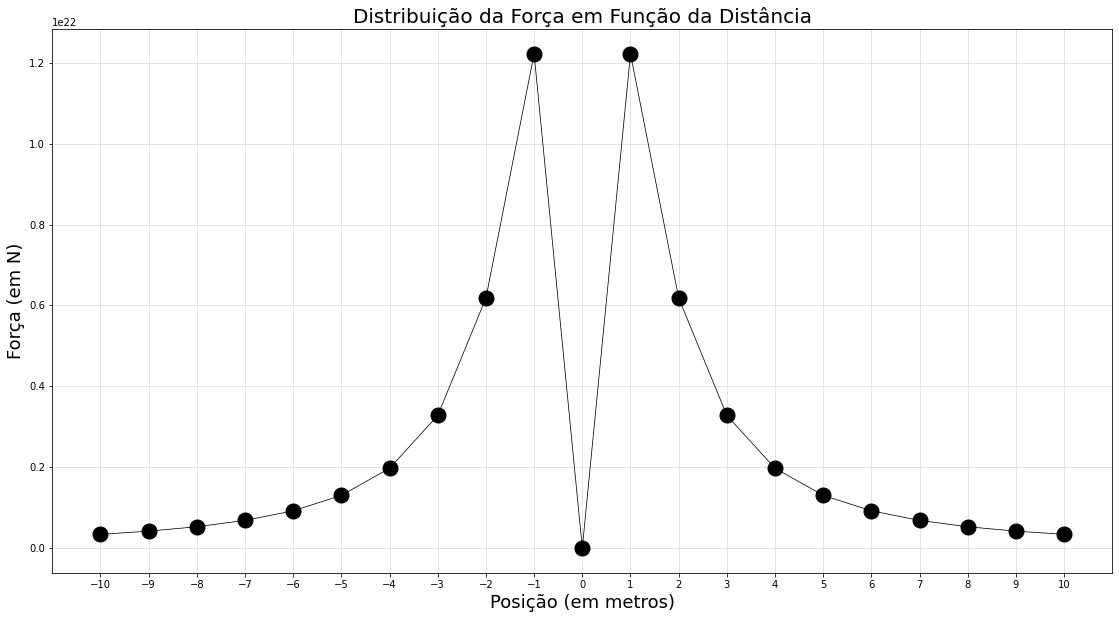

In [29]:
# Plotando um gráfico da distribuição
plt.figure(figsize=(19, 10))
plt.plot(tabelaf['f'], 'o-', color='k', linewidth=.75, markersize=15)
plt.title('Distribuição da Força em Função da Distância', fontsize=20)
plt.xlabel('Posição (em metros)', fontsize=18)
plt.ylabel('Força (em N)', fontsize=18)
plt.xticks(range(-10, 11))
plt.grid(True, color='gainsboro')
plt.show()

##### **Resposta**
O modulo da força resultante sobre a carga Q pode ser calculado por meio das Equação (1) e (16). Os resultados para as posições de -10m a 10m no eixo x podem ser obtidas por meio do programa, e são mostrados na tabela abaixo:

| Xm  | $F$      | $\vec{F}$ |
|:---:|:--------:|:---------:|
| -10 | 3.40E+20 | -3.40E+20i + 0j + 0k |
| -9  | 4.19E+20 | -4.19E+20i + 0j + 0k |
| -8  | 5.28E+20 | -5.28E+20i + 0j + 0k |
| -7  | 6.84E+20 | -6.84E+20i + 0j + 0k |
| -6  | 9.21E+20 | -9.21E+20i + 0j + 0k |
| -5  | 1.30E+21 | -1.30E+21i + 0j + 0k |
| -4  | 1.97E+21 | -1.97E+21i + 0j + 0k |
| -3  | 3.28E+21 | -3.28E+21i + 0j + 0k |
| -2  | 6.18E+21 | -6.18E+21i + 0j + 0k |
| -1  | 1.22E+22 | -1.22E+22i + 0j + 0k |
| 0   | 0        | 0  + 0j + 0k         |
| 1   | 1.22E+22 | 1.22E+22i  + 0j + 0k  |
| 2   | 6.18E+21 | 6.18E+21i  + 0j + 0k  |
| 3   | 3.28E+21 | 3.28E+21i  + 0j + 0k  |
| 4   | 1.97E+21 | 1.97E+21i  + 0j + 0k  |
| 5   | 1.30E+21 | 1.30E+21i  + 0j + 0k  |
| 6   | 9.21E+20 | 9.21E+20i  + 0j + 0k  |
| 7   | 6.84E+20 | 6.84E+20i  + 0j + 0k  |
| 8   | 5.28E+20 | 5.28E+20i  + 0j + 0k  |
| 9   | 4.19E+20 | 4.19E+20i  + 0j + 0k  |
| 10  | 3.40E+20 | 3.40E+20i  + 0j + 0k  |

---

#### 6ª Questão
_Implemente um programa em Python para a visualização das linhas de força do campo elétrico entre duas cargas pontuais sobre o eixo x separados por uma certa distância (conforme o algoritmo explicado em sala de aula)._

##### **Solução**
Utilizando as funções criadas para calcular as equações necessárias para a resolução das questões anteriores é possivel criar um programa capaz de gerar a visualização das linhas de força entre cargas pontuais.

<Figure size 432x324 with 0 Axes>

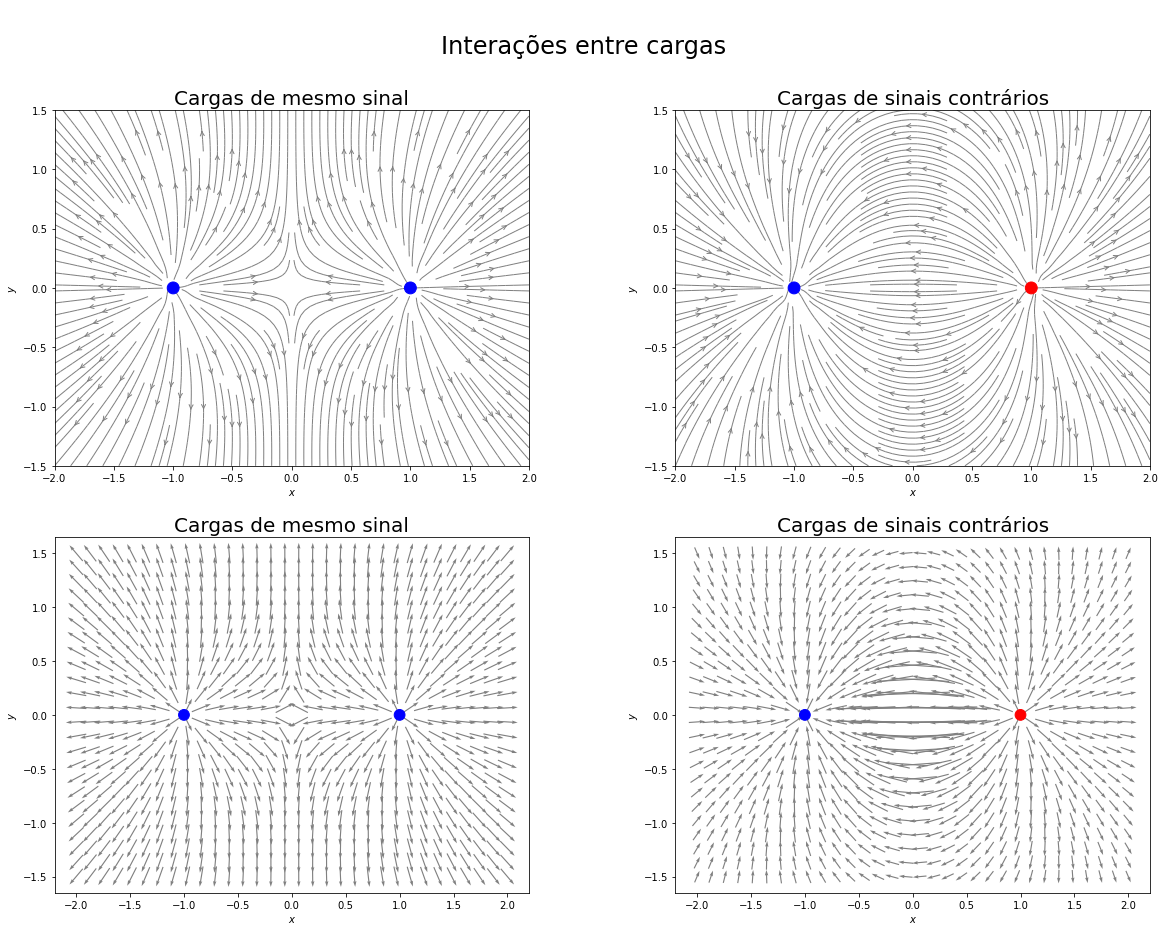

In [32]:
plt.figure(figsize=(6, 4.5))
 
# Criando um grid de pontos onde serão calculados os vetores "Nrq"
x6 = np.linspace(-2, 2, 32)
y6 = np.linspace(-1.5, 1.5, 24)
x6, y6 = np.meshgrid(x6, y6)

# Calculando os vetores campo elétrico
q6 = 2e-9
rq61 = (-1, 0)
rq62 = (1, 0)
r6 = (x6, y6)

Ex61, Ey61, E61 = Ev2D(q6, rq61, r6)
Ex62, Ey62, E62 = Ev2D(q6, rq62, r6)
Ex612, Ey612, E61 = Ev2D(-q6, rq61, r6)

Ex = Ex61+Ex62
Ey = Ey61+Ey62
Ex2 = Ex612 + Ex62
Ey2 = Ey612 + Ey62
EE = np.sqrt(Ex**2+Ey**2)


# Plotando
fig, axs = plt.subplots(2, 2, figsize=(20.4, 14.4))
fig.suptitle('\nInterações entre cargas', fontsize=24)
axs[0,0].streamplot(x6, y6, Ex, Ey, density=2, linewidth=1, arrowstyle='->', color='grey')
axs[0,0].set_xlabel('$x$')
axs[0,0].set_ylabel('$y$')
axs[0,0].axis('image')
axs[0,0].add_artist(Circle((-1, 0), 0.05, color ='b', zorder=3))
axs[0,0].add_artist(Circle((1, 0), 0.05, color ='b', zorder=3))
axs[0,0].set_title('Cargas de mesmo sinal', fontsize=20)

axs[1,0].quiver(x6, y6, Ex/EE, Ey/EE, linewidth=1, pivot='middle', scale_units="inches", scale=3.5, color = 'gray')
axs[1,0].set_xlabel('$x$')
axs[1,0].set_ylabel('$y$')
axs[1,0].axis('image')
axs[1,0].add_artist(Circle((-1, 0), 0.05, color ='b', zorder=3))
axs[1,0].add_artist(Circle((1, 0), 0.05, color ='b', zorder=3))
axs[1,0].set_title('Cargas de mesmo sinal', fontsize=20)

axs[0,1].streamplot(x6, y6, Ex2, Ey2, density=2, linewidth=1, arrowstyle='->', color='grey')
axs[0,1].set_xlabel('$x$')
axs[0,1].set_ylabel('$y$')
axs[0,1].axis('image')
axs[0,1].add_artist(Circle((-1, 0), 0.05, color ='b', zorder=3))
axs[0,1].add_artist(Circle((1, 0), 0.05, color ='r', zorder=3))
axs[0,1].set_title('Cargas de sinais contrários', fontsize=20)

axs[1,1].quiver(x6, y6, Ex2/EE, Ey2/EE, linewidth=1, pivot='middle', scale_units="inches", scale=3.5, color = 'gray')
axs[1,1].set_xlabel('$x$')
axs[1,1].set_ylabel('$y$')
axs[1,1].axis('image')
axs[1,1].add_artist(Circle((-1, 0), 0.05, color ='b', zorder=3))
axs[1,1].add_artist(Circle((1, 0), 0.05, color ='r', zorder=3))
axs[1,1].set_title('Cargas de sinais contrários', fontsize=20)
plt.show()

---

#### 7ª Questão
_Faça um programa em Python que mostre o vetor campo elétrico de uma carga no espaço._

##### **Solução**
Podemos aproveitar o mesmo princípio da questão anterior para visualizar o vetor campo elétrico de um ponto. Para isso, ao invés de utilizarmos um grid, apenas informamos a posição do ponto.

O código em Python que realiza esses cálculos é descrito a seguir.

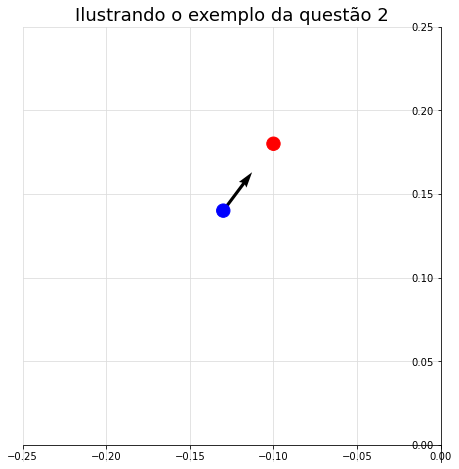

In [13]:
# Usando os dados da questão 2 como exemplo
fig, ax = plt.subplots(figsize=(8,8))

q7 = -3e-9
rq7 = (-0.1, 0.18)
r7 = (-0.13, 0.14)
Ex7, Ey7, E71 = Ev2D(q7, rq7, r7)

ax.set(ylim=(-0.01, 0.25))
ax.set(xlim=(-0.25, 0))
plt.grid(True, color='gainsboro')

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

ax.quiver(r7[0], r7[1], Ex7/E71, Ey7/E71, scale_units='inches', scale=1.5, zorder=3)
ax.set_aspect('equal')
ax.add_artist(Circle((r7[0], r7[1]), 0.00400, color ='b', zorder=3))
ax.add_artist(Circle((rq7[0], rq7[1]), 0.00400, color ='r', zorder=3))
ax.set_title('Ilustrando o exemplo da questão 2', fontsize=18)

plt.show()

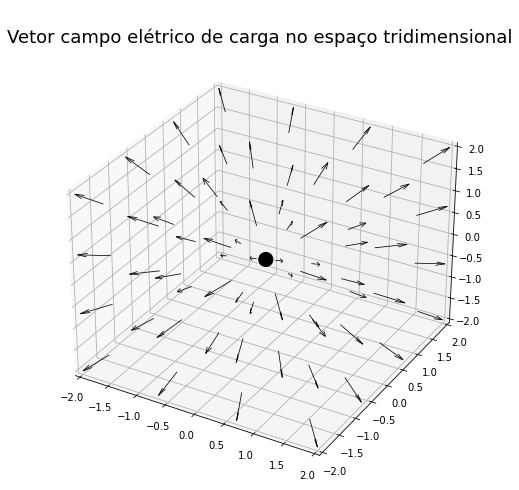

In [77]:
# Se a 7 questão for para fazer um plot no espaço tridimensional:
ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')

lx7, ly7, lz7 = 2, 2, 2
gridwidth = 4
x7, y7, z7 = np.meshgrid(np.linspace(-lx7, lx7, gridwidth), np.linspace(-ly7, ly7,gridwidth),np.linspace(-lz7, lz7, gridwidth) ) #Mesh generation

r7 = np.sqrt(x7**2+y7**2+z7**2)

# Position coordinates of point charge and charge
x71, y71, z71 = 0,0,0
q7 = 1
r71 = np.sqrt((x71-x7)**2+(y71-y7)**2+(z71-z7)**2)

u7 = q7*(x7-x71)/(r71**2)
v7 = q7*(y7-y71)/(r71**2)
w7 = q7*(z7-z71)/(r71**2)

# Quando a carga for muito pequena é preciso ajustar as setas ou mudar o parametro normalize para True
ax.quiver(x7, y7, z7, u7, v7, w7, color='k',length=0.5, normalize=True, pivot='tip', linewidth=.75)

ax.set_xlim([-lx7, lx7])
ax.set_ylim([-ly7, ly7])
ax.set_zlim([-lz7, lz7])
ax.add_artist(Circle((x71, y71, z71), 0.00300, color ='k', zorder=3))
plt.title('\nVetor campo elétrico de carga no espaço tridimensional', fontsize=18)
plt.show()